# **QSAR Model Building of Acetylcholinesterase Inhibitors**

# Read in data

In [1]:
import pandas as pd

In [2]:
ds = '../data/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(ds)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.978811
5659,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.913640
5660,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.838632
5661,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.537902


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5659,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5660,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5661,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
5658    4.978811
5659    5.913640
5660    5.838632
5661    4.537902
5662    8.193820
Name: pIC50, Length: 5663, dtype: float64

# Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,0,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
5659,0,1,0,0,0,1,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0
5660,0,1,0,0,0,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
5661,0,1,0,0,0,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1


In [6]:
X.to_csv('descriptor_list.csv', index = False)

In the app, use the following to get this same descriptor list
of 221 variables from the initial set of 881 variables

In [7]:
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8108675930178105

## Model Prediction

In [10]:
Y_pred = model.predict(X)
Y_pred

array([5.82951307, 6.25235908, 4.91089342, ..., 4.91491799, 4.57470416,
       6.89321192])

## Model Performance

In [11]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.48
Coefficient of determination (R^2): 0.81


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

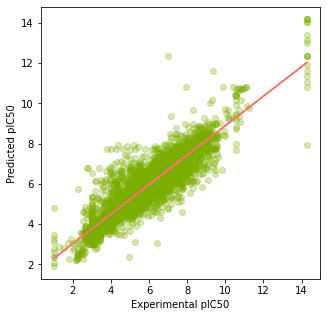

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [14]:
import pickle

In [15]:
pickle.dump(model, open('acetylcholinesterase_model.pkl', 'wb'))